# A Genetic Algorithm for Optimizing Traveling Salesman Problem

# Ridho Nur Rohman Wijaya
# 06111840000065

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.array([0, 20, 40, 100, 100, 100, 80, 60,  0,  0,
              40, 40, 60, 50, 30, 90, 10, 20, 60, 80])
y = np.array([0,  0,  0,   0,  30,  50, 50, 50, 50, 20,
              20, 30, 20, 25, 10, 15, 30, 40, 40, 40])

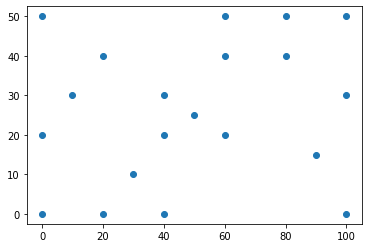

In [3]:
plt.scatter(x, y)
plt.show()

In [4]:
# number of cities / points
m = len(x)

# number of chromosomes in population
n = 100

# maximum generation
N = 200

In [5]:
# distance matrix
d = np.array([np.sqrt((x[i] - x)**2 + (y[i] - y)**2) for i in range(m)])

In [6]:
def createPopulation():
    pop = [np.random.permutation(m) for i in range(n)]
    pop = pd.DataFrame(pop)
    return pop

In [7]:
def fitness(pop):
    fitness = np.zeros(n, dtype=int)
    for k in range(n):
        a = pop.loc[k]
        b = d[a[m-1], a[0]]
        b += sum([d[a[i], a[i+1]] for i in range(m-1)])
        fitness[k] = b
    pop['fitness'] = fitness
    return pop

In [8]:
def randomSelection(m):
    position = np.random.permutation(m)
    return position[0], position[1]

In [9]:
def crossover(pop):
    popc = pop.copy()
    for i in range(n):
        a, b = randomSelection(m)
        idx1 = min(a,b)
        idx2 = max(a,b)
        temp = list(pop.loc[a][idx1:idx2+1])
        temp += [val for val in pop.loc[b] if val not in temp]
        popc.loc[i] = temp
    return popc

In [10]:
def mutation(popc):
    popm = popc.copy()
    for i in range(n):
        a, b = randomSelection(m)
        temp = popm.loc[i][a]
        popm.loc[i][a] = popm.loc[i][b]
        popm.loc[i][b] = temp
    return popm

In [11]:
def combinePopulation(pop, popc, popm):
    popAll = pop.copy()
    popAll = popAll.append(popc)
    popAll = popAll.append(popm)
    popAll = popAll.drop_duplicates()
    popAll.index = range(len(popAll))
    return popAll

In [12]:
def sortPopulation(popAll):
    popAll = popAll.sort_values(by=['fitness'])
    popAll.index = range(len(popAll))
    return popAll

In [13]:
def elimination(popAll):
    pop = popAll.head(n)
    return pop

In [14]:
def plotSolution(pop):
    solution = pop.loc[0].values
    a = np.zeros(m+1)
    b = np.zeros(m+1)
    for i in range(m):
        a[i] = x[solution[i]]
        b[i] = y[solution[i]]
    a[m] = a[0]
    b[m] = b[0]
    plt.plot(a, b, marker = 'o')
    plt.show()

Solusi pada populasi awal
   0  1   2   3   4  5  6   7  8  ...  12  13  14  15  16  17  18  19  fitness
0  6  1  18  14  15  4  8  16  9  ...  12  13   3   7   0  10  11  19      924

[1 rows x 21 columns]


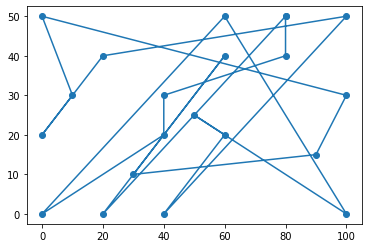


Solusi terbaik pada populasi generasi ke-20
   0   1  2   3   4   5  6  7  8  ...  12  13  14  15  16  17  18  19  fitness
0  1  14  2  13  12  15  3  4  5  ...  18  11  10  17  16   8   9   0      394

[1 rows x 21 columns]


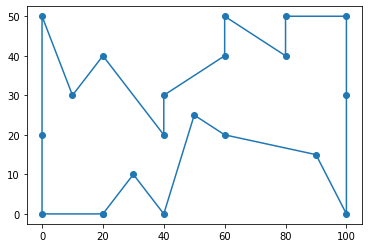


Solusi terbaik pada populasi generasi ke-40
    0  1   2  3  4  5   6  7   8  ...  12  13  14  15  16  17  18  19  fitness
0  17  8  16  9  0  1  14  2  10  ...   3   4   5   6  19   7  18  11      375

[1 rows x 21 columns]


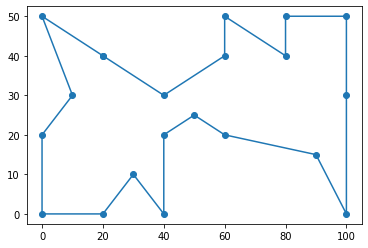


Solusi terbaik pada populasi generasi ke-60
    0  1   2  3  4  5   6  7   8  ...  12  13  14  15  16  17  18  19  fitness
0  17  8  16  9  0  1  14  2  10  ...   3   4   5   6  19   7  18  11      375

[1 rows x 21 columns]


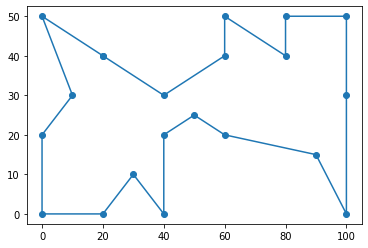


Solusi terbaik pada populasi generasi ke-80
    0  1   2  3  4  5   6  7   8  ...  12  13  14  15  16  17  18  19  fitness
0  17  8  16  9  0  1  14  2  10  ...   3   4   5   6  19   7  18  11      375

[1 rows x 21 columns]


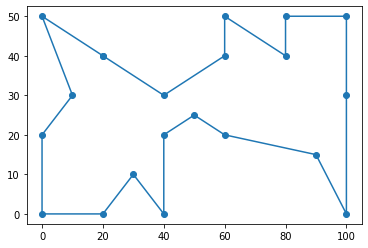


Solusi terbaik pada populasi generasi ke-100
    0  1   2  3  4  5   6  7   8  ...  12  13  14  15  16  17  18  19  fitness
0  17  8  16  9  0  1  14  2  10  ...   3   4   5   6  19   7  18  11      375

[1 rows x 21 columns]


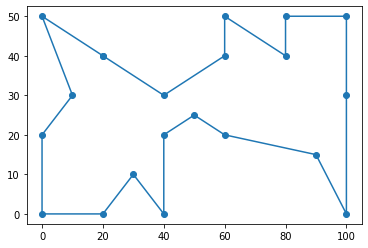


Solusi terbaik pada populasi generasi ke-120
    0  1   2  3  4  5   6  7   8  ...  12  13  14  15  16  17  18  19  fitness
0  17  8  16  9  0  1  14  2  10  ...   3   4   5   6  19   7  18  11      375

[1 rows x 21 columns]


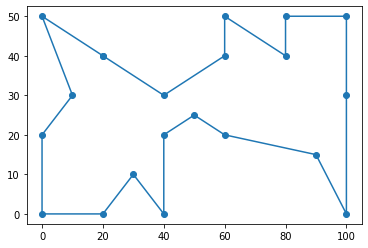


Solusi terbaik pada populasi generasi ke-140
    0  1   2  3  4  5   6  7   8  ...  12  13  14  15  16  17  18  19  fitness
0  17  8  16  9  0  1  14  2  10  ...   3   4   5   6  19   7  18  11      375

[1 rows x 21 columns]


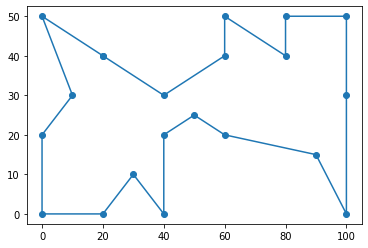


Solusi terbaik pada populasi generasi ke-160
    0  1   2  3  4  5   6  7   8  ...  12  13  14  15  16  17  18  19  fitness
0  17  8  16  9  0  1  14  2  10  ...   3   4   5   6  19   7  18  11      375

[1 rows x 21 columns]


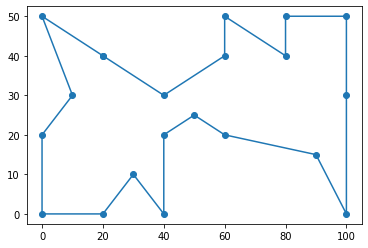


Solusi terbaik pada populasi generasi ke-180
    0  1   2  3  4  5   6  7   8  ...  12  13  14  15  16  17  18  19  fitness
0  17  8  16  9  0  1  14  2  10  ...   3   4   5   6  19   7  18  11      375

[1 rows x 21 columns]


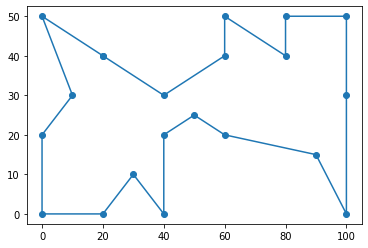


Solusi terbaik pada populasi generasi ke-200
    0  1   2  3  4  5   6  7   8  ...  12  13  14  15  16  17  18  19  fitness
0  17  8  16  9  0  1  14  2  10  ...   3   4   5   6  19   7  18  11      375

[1 rows x 21 columns]


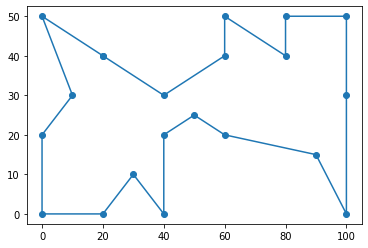


Solusi terbaik pada populasi akhir
    0  1   2  3  4  5   6  7   8  ...  12  13  14  15  16  17  18  19  fitness
0  17  8  16  9  0  1  14  2  10  ...   3   4   5   6  19   7  18  11      375

[1 rows x 21 columns]


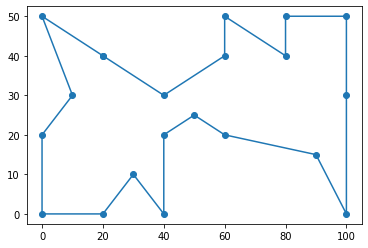

In [15]:
pop = createPopulation()
pop = fitness(pop)
print('Solusi pada populasi awal')
print(pop.head(1))
plotSolution(pop)

for i in range(1, N+1):
    popc = crossover(pop)
    popc = fitness(popc)

    popm = mutation(popc)
    popm = fitness(popm)

    popAll = combinePopulation(pop, popc, popm)
    popAll = sortPopulation(popAll)
    pop = elimination(popAll)

    if i%20 == 0: # Print solusi setiap 20 generasi
      print()
      print('Solusi terbaik pada populasi generasi ke-'+ str(i))
      print(pop.head(1))
      plotSolution(pop)

print()
print('Solusi terbaik pada populasi akhir')
print(pop.head(1))
plotSolution(pop)